# <font color='navy'>Step 1 Problem Definition - Business Perspective:</font>

* Objective: predict energy output at a Combined Cycle Power Plant
* Predicting energy output is crucial for a combined cycle power plant's business because it allows for proactive planning and optimization. By anticipating energy production based on environmental factors, businesses can make informed decisions about staffing, maintenance scheduling, fuel purchases, and even energy sales in deregulated markets. This foresight helps ensure efficient operations, reduces costs, and maximizes profit opportunities.

* Data available: hourly averages of the following variables
>* Ambient Temperature AT 1.81 - 37.11°C: The air temperature surrounding the power plant.
>* Ambient Pressure AP 992.89 - 1033.30 millibar: The air pressure pushing on the power plant from outside.
>* Relative Humidity RH 25.56% - 100.16%: The amount of moisture in the air compared to what it can hold
>* Exhaust Vacuum V 25.36 - 81.56cmHg: The pressure difference between the exhaust and the surrounding air, indicating removal efficiency.
>* Net hourly electrical energy output PE 420.26 - 495.76MW: The amount of electricity generated by the plant in a single hour.

In [ ]:
# Use the Python package installer pip to install the ucimlrepo package
!pip install ucimlrepo

# ucimlrepo stands for Unv. of California Irvine ML repository

]
'?0po 6ytg 5 3sx1 <font color='navy'>Step 2 Data Collection:</font>
* We get the data from UCIML directory.
* Of course in real life, you will use SQL, access to databases at work, write SQL querries to obtain the data.
* You will need to join tables, or even use multiple databases to get the data you need for the problem you aim to solve.

In [ ]:
### WE WILL GET THE DATA DIRECTLY FROM UCIML

# Import the fetch_ucirepo function from the ucimlrepo package
from ucimlrepo import fetch_ucirepo

# Fetch the dataset from the UCI Machine Learning Repository using its ID
combined_cycle_power_plant = fetch_ucirepo(id=294)

# Extract the features (independent variables) from the dataset as a pandas DataFrame
X = combined_cycle_power_plant.data.features

# Extract the targets (dependent variables) from the dataset as a pandas DataFrame
y = combined_cycle_power_plant.data.targets

# Note: The data is also provided on our LMS (Learning Management System) in case you prefer to use that source.


In [ ]:
# Print the shape of the features DataFrame
print("X shape:", X.shape)

# Display the first 2 rows of the features DataFrame
X.head(2)


X shape: (9568, 4)


,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08


In [ ]:
# Print the shape of the targets DataFrame
print("y shape:", y.shape)

# Display the first 2 rows of the targets DataFrame
y.head(2)

y shape: (9568, 1)


,PE
0,463.26
1,444.37


* Recall in the data collection step, we mentioned that We always need two datasets in predictive modeling: Training and Testing Data.
* The training dataset is used to build the model (i.e., computing the betas). The model learns patterns and relationships from this data to make future predictions.
* The testing dataset is used to evaluate the performance of the built model. In other words, the test dataset is our “pretend future” dataset. Because we will use our model on future observations to make predictions, we need to test how our model will perform on a dataset that has not seen before.
* Basically, we want to see if the model is good to be used for making future predictions through test dataset.


* So we have just one dataset, how we will go from one dataset two datasets.
* This is very simple: We will take the main dataset and randomly divide into training and testing sets.
* Generally, we use 70 percent for training and 30 percent for testing.
* Divising the main dataset can be done using a function.

In [ ]:
# Import the train_test_split function from scikit-learn's model_selection module
from sklearn.model_selection import train_test_split

# Import pandas and numpy libraries (used for data manipulation and numerical operations)
import pandas as pd
import numpy as np

# Split the dataset into training and testing sets
# X_train and y_train will be used to train the model
# X_test and y_test will be used to evaluate the model's performance
# test_size=0.33 indicates that 33% of the data will be used for testing, and the remaining 67% will be used for training
# random_state=42 ensures reproducibility of the split (the same random state will produce the same split every time)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [ ]:
# Print the shape of the training features DataFrame
print("X_train shape:", X_train.shape)

# Print the shape of the testing features DataFrame
print("X_test shape:", X_test.shape)

# Print the shape of the training targets DataFrame
print("y_train shape:", y_train.shape)

# Print the shape of the testing targets DataFrame
print("y_test shape:", y_test.shape)



X_train shape: (6410, 4)
X_test shape: (3158, 4)
y_train shape: (6410, 1)
y_test shape: (3158, 1)


In [ ]:
X_train.head(2) # this is the input variables with observations (input data) to be used to build a lin. regression model

,AT,V,AP,RH
7259,29.95,73.42,1011.44,66.32
7944,5.76,40.07,1013.22,62.99


In [ ]:
y_train.head(2) # this is the output variable with observations (output data) to be used to build a lin. regression model

,PE
7259,432.81
7944,494.67


In [ ]:
X_test.head(2) # this is the input variables with observations (input data) to be used to make predictions (yhat)

,AT,V,AP,RH
2513,19.64,48.06,1014.81,74.96
9411,28.26,69.23,1013.01,42.10


In [ ]:
y_test.head(2) # this is the output variable with observations (output data) to be used to compute the error (y-yhat)

,PE
2513,455.27
9411,436.31


# <font color='navy'>Step 3 Data Processing</font>
* This is a simple example. I know that hits dataset is already clean with all numerical variables without any outliers, missing values, or known issues. The dataset is pretty much ready to go.
* But in real life, you will need to do all the steps as outlined in previous modules, particularly in the data preprocessing modeule.
* You will need to extract features (recall the movies dataset where we extracted the cast information, directors, writers)
* You will handle missing values outliers
* You will need to standardize/scale the numerical variables.
* You will convert categorical variables into numerical variables
* If you have text data like feedback comments you will need to process that data to creaste tf-idf/dtm etc.

In [ ]:
# All I will do is to scale the data
# Import the StandardScaler class from scikit-learn's preprocessing module
# I will do this only for numerical variables.
# All dataset is numerical so I can do it for the entire dataset
columns = X_train.columns
from sklearn.preprocessing import StandardScaler
#from sklearn import preprocessing

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training features
scaler.fit(X_train)

# Transform the training features using the scaler
X_train = scaler.transform(X_train)

X_train = pd.DataFrame(X_train, columns = columns)
X_train.head()

,AT,V,AP,RH
0,1.385388,1.507499,-0.301404,-0.477307
1,-1.868925,-1.121784,-0.001342,-0.704233
2,1.316777,0.790852,-0.308147,-0.786689
3,1.772838,1.579242,-0.301404,-1.560825
4,-0.375628,-1.156474,-1.476368,0.693437


In [ ]:
y_train.reset_index(drop = True, inplace = True)
y_train

,PE
0,432.81
1,494.67
2,442.32
3,427.36
4,466.68
...,...
6405,444.03
6406,474.67
6407,435.06
6408,471.13


# <font color='navy'>Step 4 EDA and Data Visualization:</font>
* We have covered descriptive statistics and data visualization techniques in the previous modules.
* Conduct some de scriptive statistics
* Develop hypotheses and test them
* Do some visualizations.
* Feel free to do some explaratory analysis.

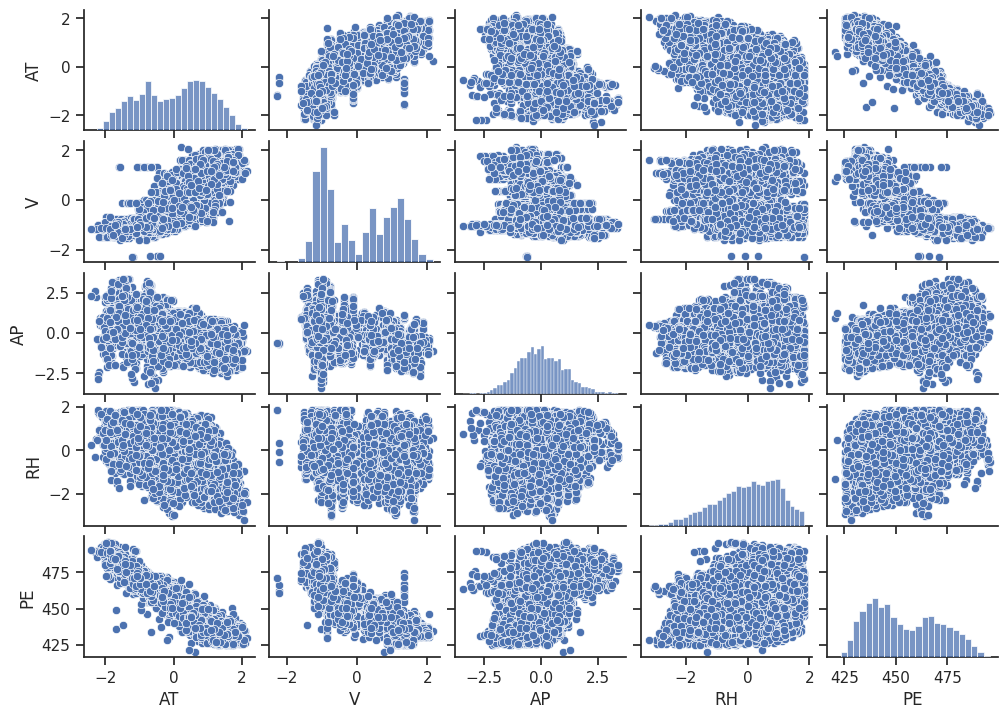

In [ ]:
# Import the seaborn library for statistical data visualization
import seaborn as sns

# Import the matplotlib library for creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots to "ticks" using seaborn
sns.set_theme(style="ticks")

# Create a copy of the training features DataFrame
data = X_train.copy()

# Add the training targets to the copied DataFrame as a new column 'PE'
data['PE'] = y_train.values[:,0] # this is the output variable with observations (output data) to be used to build a lin. regression model


# Create a pair plot using seaborn to visualize the relationships between variables
ax = sns.pairplot(data)

# Set the height of the entire figure
ax.fig.set_figheight(7)

# Set the width of the entire figure
ax.fig.set_figwidth(10)

# Show the plot
plt.show()

* Approximately linear relationship between PE and the negative of AT
* Approximately linear relationship between PE nd the negative of V

# <font color='navy'>Step 5 Model Building - Linear Regression:</font>

In [ ]:
# Import linear_model module from scikit-learn for linear regression
from sklearn import linear_model

# Create a linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
# The fit method is used to train the linear regression model with the training data (X_train and y_train)
regr.fit(X_train, y_train)


LinearRegression()

In [ ]:
X_train.head(2)

,AT,V,AP,RH
0,1.385388,1.507499,-0.301404,-0.477307
1,-1.868925,-1.121784,-0.001342,-0.704233


In [ ]:
# Print the coefficients of the linear regression model
# These coefficients (regr.coef_) represent the values of beta1 through beta4 in the regression equation
print("Coefficients: \n", regr.coef_)


Coefficients: 
 [[-14.87791192  -2.89912628   0.29642443  -2.35861929]]


In [ ]:
# Print the intercept of the linear regression model
# This intercept (regr.intercept_) represents the value of beta0 in the regression equation
print("Intercept: \n", regr.intercept_)


Intercept: 
 [454.36327613]


* Making Predictions
* The X_test should go though the same processing pipeline


In [ ]:
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns = columns)

In [ ]:
X_test[0:1] # test data input

,AT,V,AP,RH
0,-0.001631,-0.49186,0.266691,0.111472


In [ ]:
X_test[0:1].values # test data input in the format of a numpy array

array([[-0.00163054, -0.49186015,  0.2666915 ,  0.11147203]])

In [ ]:
regr.coef_ #These coefficients (regr.coef_) represent the values of beta1 through beta4 in the regression equatio

array([[-14.87791192,  -2.89912628,   0.29642443,  -2.35861929]])

* **Make predictions**

In [ ]:
# Lets make a prediction
# yhat = b0+ b1*x1 + b2*x2 + b3*x3 + b4*x4


yhat = np.sum(regr.coef_*X_test[0:1].values)+regr.intercept_[0]
print(yhat)

455.62963360812466


In [ ]:
y_test[0:1] # this is the actual. compare it with yhat

,PE
2513,455.27


* **make predictions in one go using the predict function**

In [ ]:
# Use the linear regression model to make predictions on the test set
# The predict method calculates the predicted values (yhat) for the test features (X_test)
pred = regr.predict(X_test)

# Print the array of predicted values
pred


array([[455.62963361],
       [438.72924417],
       [434.14156621],
       ...,
       [428.87026751],
       [469.78037233],
       [446.43264723]])

In [ ]:
# Calculate the error between the actual target values (y_test) and the predicted values (pred)
# This is done by subtracting the predicted values from the actual target values
error = y_test.values - pred

# Print the array of errors
error


array([[-0.35963361],
       [-2.41924417],
       [ 6.53843379],
       ...,
       [ 4.56973249],
       [ 0.67962767],
       [ 1.97735277]])

* **Compute performance**
>* **RMSE:** RMSE, or Root Mean Square Error, tells you how accurate a prediction is on average, by looking at the squared difference between what was predicted and what actually happened. It's important for evaluating machine learning models.
>* **Rsquared:** R-squared is another metric used in regression analysis to assess how well a model fits the data.expand_more It essentially tells you what proportion of the variance in the output variable can be explained by the input variables in your model. Imagine it as a percentage between 0 and 100, where 0% means the model doesn't explain any of the variation and 100% means it explains everything.


In [ ]:
# Import the mean_squared_error and r2_score functions from scikit-learn's metrics module
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Import the math module for mathematical operations
import math

# Calculate the Root Mean Squared Error (RMSE) between the actual and predicted values
rmse = math.sqrt(mean_squared_error(y_test, pred))

# Calculate the Coefficient of Determination (R^2 score) to measure the model's performance
r2 = r2_score(y_test, pred)

# Print the Root Mean Squared Error (RMSE) with 2 decimal places
print("Root Mean squared error: %.2f" % rmse)

# Print the Coefficient of Determination (R^2 score) with 2 decimal places
print("Coefficient of determination: %.2f" % r2)


Root Mean squared error: 4.61
Coefficient of determination: 0.93


In [ ]:
y_test.values[:,0] - pred[:,0]

array([-0.35963361, -2.41924417,  6.53843379, ...,  4.56973249,
        0.67962767,  1.97735277])

**Let's Check the Linear Regression Assumption:**
1. Homoscedasticity: Homoscedasticity refers to the condition in which the variance of errors or residuals in a regression model is constant across all levels of the independent variable. This assumption ensures that the model's predictions are equally reliable for all values of the independent variable. Homoscedasticity means that the spread or scatter of errors in a data set is the same, no matter what the value of the independent variable is. This helps ensure that the predictions from a statistical model are consistently accurate.







<Axes: >

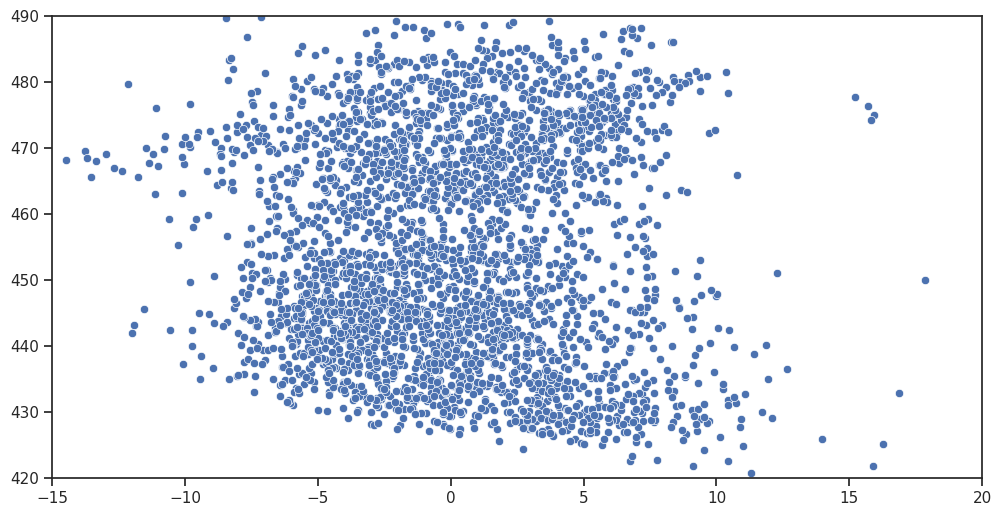

In [ ]:
fig, ax = plt.subplots(figsize=(12,6)) # Determines the figure size
ax = sns.scatterplot(x = y_test.values[:,0] - pred[:,0], y = pred[:,0])
#plots the error vs. predicted
limits = ax.set(xlim=(-15, 20), ylim=(420, 490)) #sets the limit for x and y axis
ax

**Let's check the normality assumption**
* A probability plot of residuals in linear regression shows whether the residuals (the differences between observed and predicted values) follow a normal distribution. If the points on the plot closely follow a straight line, it indicates that the residuals are normally distributed, which is an assumption for many statistical tests and models
* Deviations from this line suggest that the residuals may not be normally distributed, which could indicate potential problems with the model.

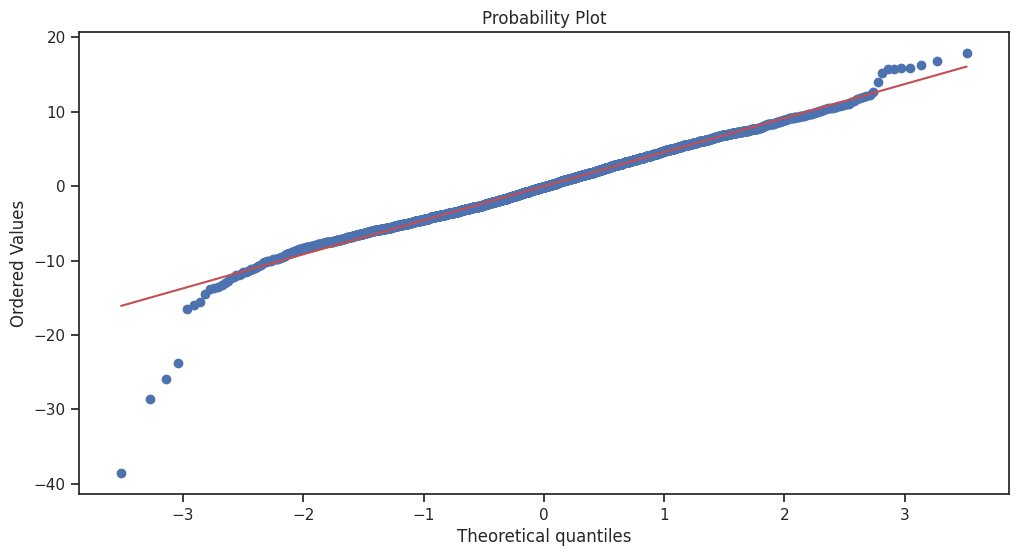

In [ ]:
from scipy import stats

fig, ax = plt.subplots(figsize=(12,6)) # Determines the figure size


_, (__, ___, r) = stats.probplot(y_test.values[:,0] - pred[:,0], plot=ax, fit=True)
# generates the normality plot

# <font color='navy'>Step 5 Model Building - Decision Trees:</font>

In [ ]:
# Import the tree module from scikit-learn
from sklearn import tree

# Create a Decision Tree Regressor object with a maximum depth of 3
reg_tree = tree.DecisionTreeRegressor(max_depth=5)

# Train the decision tree regressor using the training data
reg_tree.fit(X_train, y_train)

# Make predictions on the training data
pred_train = reg_tree.predict(X_train)

# Make predictions on the test data
pred_test = reg_tree.predict(X_test)

# Calculate the Root Mean Squared Error (RMSE) for the training data
rmse_train = math.sqrt(mean_squared_error(pred_train, y_train))

# Calculate the Coefficient of Determination (R^2 score) for the training data
r2_train = r2_score(pred_train, y_train)

# Calculate the Root Mean Squared Error (RMSE) for the test data
rmse_test = math.sqrt(mean_squared_error(pred_test, y_test))

# Calculate the Coefficient of Determination (R^2 score) for the test data
r2_test = r2_score(pred_test, y_test)

# Print the Root Mean Squared Error (RMSE) for the training data with 2 decimal places
print("Mean squared error train data: %.2f" % rmse_train)

# Print the Coefficient of Determination (R^2 score) for the training data with 2 decimal places
print("Coefficient of determination train data: %.2f" % r2_train)

# Print the Root Mean Squared Error (RMSE) for the test data with 2 decimal places
print("Mean squared error test data: %.2f" % rmse_test)

# Print the Coefficient of Determination (R^2 score) for the test data with 2 decimal places
print("Coefficient of determination test data: %.2f" % r2_test)


Mean squared error train data: 4.26
Coefficient of determination train data: 0.93
Mean squared error test data: 4.51
Coefficient of determination test data: 0.93


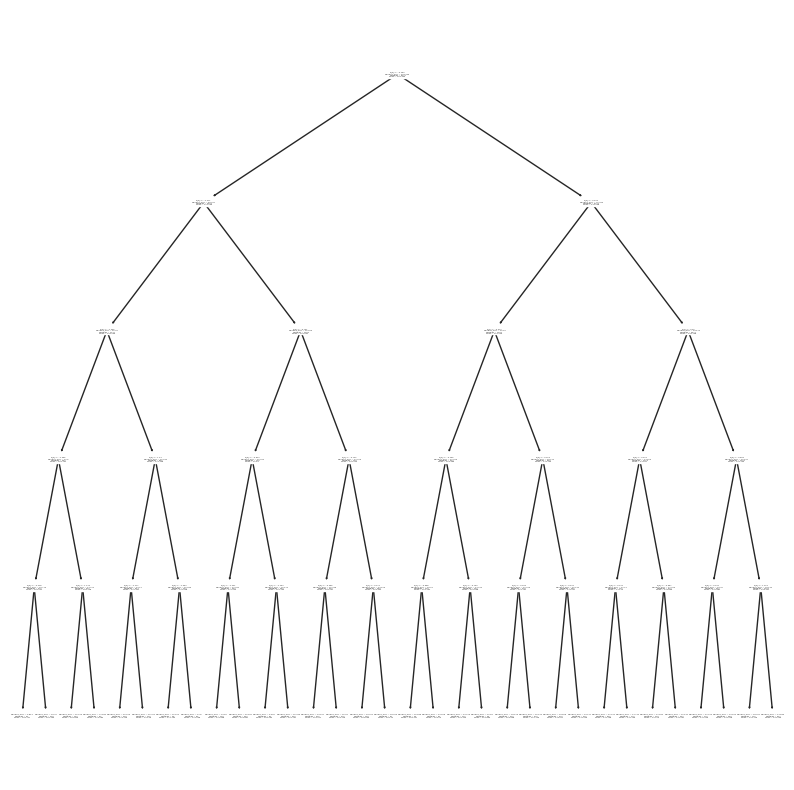

In [ ]:
# Import the tree module from scikit-learn
from sklearn import tree

# Set the size of the figure for the plot
plt.figure(figsize=(10,10))

# Plot the decision tree using scikit-learn's plot_tree function
tree.plot_tree(reg_tree)

# Display the plot
plt.show()


In [ ]:
reg_tree.feature_importances_

array([0.96612307, 0.03387693, 0.        , 0.        ])

<Axes: >

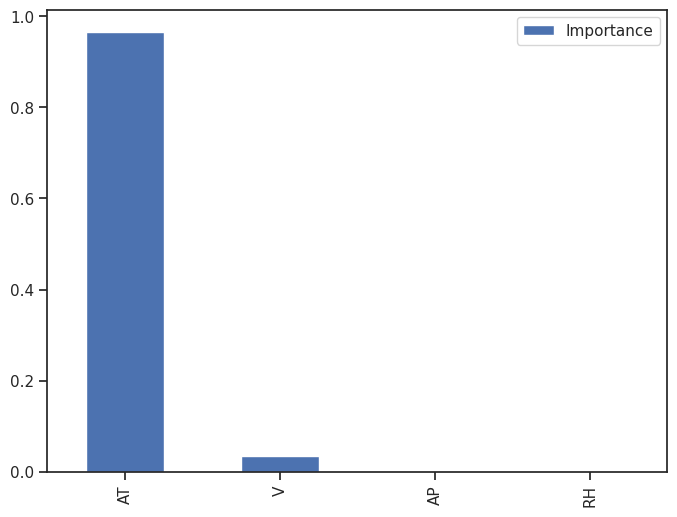

In [ ]:
import matplotlib.pyplot as plt

feat_importances = pd.DataFrame(reg_tree.feature_importances_, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))